In [1]:
%matplotlib inline

In [41]:
import matplotlib.pylab as plt
import numpy as np

In [42]:
# nn = 7000
# nx = 410
# ny = 110

In [80]:
grav  = 9.806   
dt =  0.15  
tmax =  2000.
xsplit = 100.
xn = 0.05     

In [43]:
epsh = 0.0025  #  depth tolerence for dry bed problems.
beta =  2.0    # 
xk  =  3.9217e-4  #
ainflt =      0.5  
binflt =     2.65e-7
tc = 6840.
cappa = 0.99

In [235]:
istart = 0   
imass  = 0  
ifront  = 0 
nprt = 10
nbcell = 386

In [236]:
isurf = 1

In [45]:
i = 0
dryin = []
for line in open("dryin.dat", 'r'):
    i += 1
    item = line.rstrip() # strip off newline and any other trailing whitespace
    dryin.append(line)

In [224]:
## Lines 790-793
# inum = number of boundary faces in a boundary cell.  inum =2 for corner cells
j = []; 
k = [];
nrow = 63
ncol = 94
inum = np.zeros([ncol+1,nrow+1], dtype = int)
itype = np.zeros([ncol+1, nrow+1, 2])    
ipos = np.zeros([ncol+1, nrow+1, 2]) 

for line in range(11, 11+386):
    #print dryin[line]
    a = dryin[line].strip().split(" ")
    a = [int(x) for x in a if x]
    j = a[0] 
    k = a[1] 
    inum[j, k] = a[2]
    itype[j,k,0]= a[3]
    if a[2] == 1:
        ipos[j, k,0] = a[4]
    elif a[2] > 1:
        itype[j,k,1]= a[4]
        ipos[j,k,0]= a[5]
        ipos[j,k,1] = a[6]  

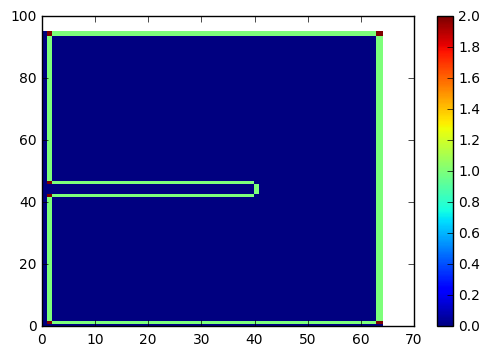

In [225]:
plt.pcolor(inum[:, :]); 
plt.colorbar()

In [226]:
## lines 797-799
kbeg = [0]
kend = [0]
for line in range(400, 399+ncol):
    #print dryin[line]
    a = dryin[line].strip().split(" ")
    a = [int(x) for x in a if x]
    kbeg.append(a[1])
    kend.append(a[2])

kbeg.append(kbeg[-1])
kend.append(kend[-1])

In [227]:
h0l = 0.
u0l = 0. 
v0l = 0.

In [228]:
h0r = 0.
u0r = 0.
v0r = 0.

In [229]:
ndir = 3

In [230]:
dryin[500].strip().split()

cols = ['j', 'k' , 'fix_h', 'fix_u',  'fix_v', 'period', 'amplitude']

In [231]:
fix = np.zeros([ncol+1, nrow+1, 3])

for i, line in enumerate(range(501, 501+ ndir)):
    a = dryin[line].strip().split(" ")
    a = [float(x.strip().replace("d", "")) for x in a if x]
    j = int(a[0])
    k = int(a[1])
    
    fix[j, k, 0] = a[2]
    fix[j, k, 1] = a[3]    
    fix[j, k, 2] = a[4]    
    

In [233]:
# number of monitoring points
nmon = 3
period = 1.

In [234]:
xmon = np.zeros(3)
ymon = np.zeros(3)
for i, line in enumerate(range(507, 507+ nmon)):
    a = dryin[line].strip().split(" ")
    a = [float(x.strip().replace("d", "")) for x in a if x]
    i = int(a[0]- 1)
    xmon[i] = a[1]
    ymon[i] = a[2]

In [238]:
isurf = 1 # 'enter a 1 to set free surface elevation'
#isurf = 2 # 'enter a 2 to set flow depth'


In [ ]:
ilim = 5 #  for Beta family
sw = 0  

## Grid subroutine, called from the input subroutine

In [239]:
i = 0
coords = []
for line in open("coords", 'r'):
    i += 1
    item = line.rstrip() # strip off newline and any other trailing whitespace
    coords.append(line)

In [240]:
npt, ne = [int(j) for j in coords[0].split()]

In [242]:
x = np.arange(float(npt+1))
y = np.arange(float(npt+1))
z = np.arange(float(npt+1))

for i in range(1, npt+1):
    x[i], y[i], z[i] = [float(l) for l in coords[i].split()]

In [113]:
# nopdum = np.zeros([ne, 4] , dtype = int) 
# for i in range(ne):
#     nopdum[i] = [int(l) for l in coords[i+1+npt].split()]

In [243]:
nop = np.zeros([ncol+1,nrow+1, 4], dtype = int)
count = 0
for j in range(1, ncol+1):
    for k in range(kbeg[j], kend[j]+1):
        nop[j, k, :]  = [int(l) for l in coords[count+1+npt].split()]
        count += 1

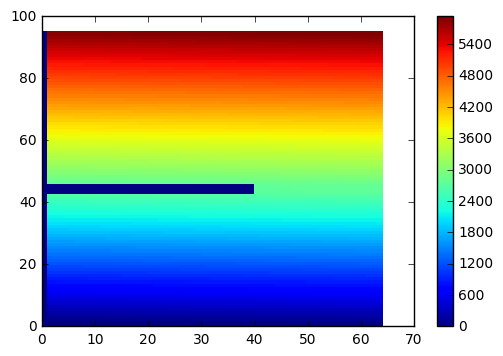

In [244]:
plt.pcolor(nop[:, :, 0])
plt.colorbar()

In [245]:
xc  = np.zeros([ncol+2, nrow+2])
yc  = np.zeros([ncol+2, nrow+2])
zc  = np.zeros([ncol+2, nrow+2])

dxi  = np.zeros([ncol+2, nrow+2, 2])
deta  = np.zeros([ncol+2, nrow+2, 2])
dz  = np.zeros([ncol+2, nrow+2, 2])

area = np.zeros([ncol+2, nrow+2])
sx = np.zeros([ncol+2, nrow+2])
sy = np.zeros([ncol+2, nrow+2])

In [246]:
## Compute grid matrics
for j in range(1, ncol+1):
    for k in range(kbeg[j], kend[j]+1):
        n1 = nop[j, k, 0] 
        n2 = nop[j, k, 1]       
        n3 = nop[j, k, 2]        
        n4 = nop[j, k, 3]  
        xc[j,k] = 0.25*(x[n1] + x[n2] + x[n3] + x[n4])        
        #xc[j,k] = 0.25*(x[nop[j, k] - 1]).sum() 
        yc[j,k] = 0.25*(y[n1] + y[n2] + y[n3] + y[n4])
        zc[j,k] = 0.25*(z[n1] + z[n2] + z[n3] + z[n4])
        dxdxi = 0.5*(-x[n1]+x[n2] + x[n3] - x[n4])
        dxdeta = 0.5*(-x[n1]-x[n2] + x[n3] + x[n4])        
        dydxi = 0.5*(-y[n1]+y[n2] + y[n3] - y[n4])
        dydeta = 0.5*(-y[n1]-y[n2] + y[n3] + y[n4])        
        area[j,k] = dxdxi*dydeta - dxdeta*dydxi
        if area[j,k] < 0:
            print "error"    
        dxi[j,k,0] =  dydeta/area[j,k]
        deta[j,k,0] = -dydxi/area[j,k]
        dxi[j,k,1] =  -dxdeta/area[j,k]
        deta[j,k,1] = dxdxi/area[j,k] 
        sx[j,k] = ((z[n2]-z[n4])*(y[n3]-y[n1])-(z[n3]-z[n1])*(y[n2]-y[n4]))/(2.*area[j,k])
        sy[j,k] = ((z[n3]-z[n1])*(y[n2]-y[n4])-(z[n2]-z[n4])*(y[n3]-y[n1]))/(2.*area[j,k])  
        dz[j,k,0] = sx[j,k]*dxdxi + sy[j,k]*dydxi
        dz[j,k,1] = sx[j,k]*dxdeta+ sy[j,k]*dydeta 

In [195]:
## Compute cell face angles
ds  = np.zeros([ncol+2, nrow+2, 2])
sn  = np.zeros([ncol+2, nrow+2, 2])
cn  = np.zeros([ncol+2, nrow+2, 2])
for j in range(1, ncol+1):
    for k in range(kbeg[j] , kend[j]+1):
        ddx =  x[nop[j,k,1]] - x[nop[j,k,0]] 
        ddy =  y[nop[j,k,1]] - y[nop[j,k,0]] 
        ds[j,k,1] = np.sqrt(ddx*ddx + ddy*ddy)
        sn[j,k,1] = ddx/ds[j,k,1]
        cn[j,k,1] = -ddy/ds[j,k,1]      # Horizontal face.
        ddx =  x[nop[j, k, 3]] - x[nop[j, k, 0]] 
        ddy =  y[nop[j, k, 3]] - y[nop[j, k, 0]]
        ds[j,k,0] = np.sqrt(ddx*ddx + ddy*ddy)
        sn[j,k,0] = -ddx/ds[j,k,0]
        cn[j,k,0] =  ddy/ds[j,k,0]      # Horizontal face.
        for i in range(inum[j, k]):
            if ipos[j, k, i] == 3:
                ddx = x[nop[j,k,2]] - x[nop[j,k,3]]
                ddy = y[nop[j,k,2]] - y[nop[j,k,3]]
                ds[j,k+1,1] = np.sqrt(ddx*ddx + ddy*ddy)
                sn[j,k+1,1] = ddx/ds[j,k+1,1]   # Top (boundary) faces.
                cn[j,k+1,1] = -ddy/ds[j,k+1,1]
            elif ipos[j, k, i] == 2:
                ddx = x[nop[j,k,2]-1] - x[nop[j,k,1]-1]
                ddy = y[nop[j,k,2]-1] - y[nop[j,k,1]-1]
                ds[j+1,k,0] = np.sqrt(ddx*ddx + ddy*ddy)
                sn[j+1,k,0] = -ddx/ds[j+1,k,0]   # Right (boundary) faces.
                cn[j,k+1,0] = ddy/ds[j+1,k,0]

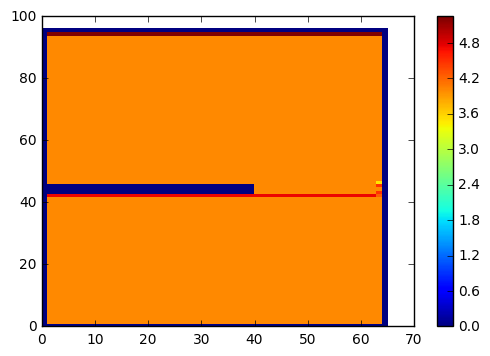

In [247]:
plt.pcolor(area); 
plt.colorbar()

In [248]:
def findbc(i, j, k, ipos):
    if ipos[j, k, i] == 1:
        jj = j
        kk = k-1
        j2 = j
        k2 = k+1
    if ipos[j, k, i] == 2:
        jj = j+1
        kk = k
        j2 = j-1
        k2 = k
    if ipos[j, k, i] == 3:
        jj = j
        kk = k+1
        j2 = j
        k2 = k-1
    if ipos[j, k, i] == 4:
        jj = j-1
        kk = k
        j2 = j+1
        k2 = k        
    return  jj, kk, j2, k2

In [200]:
# plt.imshow(zc);
# plt.colorbar()

In [201]:
## Compute some things in ghost cells
for j in range(1, ncol+1):
    for k in range(kbeg[j-1] , kend[j-1]+1):
        for i in range(inum[j, k]):
            jj, kk, j2, k2 = findbc(i, j, k, ipos)
            if (jj < 0) or (kk < 0):
                print jj, kk
            area[jj,kk] = area[j,k]
            sx[jj,kk] = sx[j,k]
            sy[jj,kk] = sy[j,k]
            dxi[jj,kk,0] = dxi[j,k,0]
            deta[jj,kk,0] = deta[j,k,0]
            dxi[jj,kk,1] = dxi[j,k,1]
            deta[jj,kk,1] = deta[j,k,1]
            xc[jj,kk] = 2.*xc[j,k] - xc[j2,k2]
            yc[jj,kk] = 2.*yc[j,k] - yc[j2,k2]
            zc[jj,kk] = 2.*zc[j,k] - zc[j2,k2]

## End of the grid subroutine!
 This subroutine only gets called once, from the input function 

In [286]:
tclip = 0.  ## mystery variable

In [316]:
## Set the initial conditions
h  = np.zeros([ncol+2, nrow+2])
hp  = np.zeros([ncol+2, nrow+2])
u  = np.zeros([ncol+2, nrow+2])
v  = np.zeros([ncol+2, nrow+2])
t0  = np.zeros([ncol+2, nrow+2])
q  = np.zeros([ncol+2, nrow+2, 3])
if istart != 1:
    t = 0.
    # dt = tmax/dfloat(nt)
    for j in range(1, ncol+1):
        for k in range(kbeg[j] , kend[j]+1):
            n1 = nop[j,k,0]
            n2 = nop[j,k,1]
            n3 = nop[j,k,2]
            n4 = nop[j,k,3]
            if xc[j,k] < xsplit:
                if isurf == 1:
                    h[j,k] = h0l - zc[j,k]
                else:
                    h[j,k] = h0l
                u[j,k] = u0l
                v[j,k] = v0l
            else:
                if isurf == 1:  
                    h[j,k] = h0r - zc[j,k]
                else:
                    h[j,k] = h0r

                u[j,k] = u0r
                v[j,k] = v0r

            if xk > 0. and h[j,k] == 0.:
                t0[j,k] = t 
for j in range(1, ncol+1):
    for k in range(kbeg[j] , kend[j]+1):
        if h[j,k] < 0.0:
            h[j,k] = 0.
        q[j,k,0] = h[j,k]
        q[j,k,1] = h[j,k]*u[j,k]
        q[j,k,2] = h[j,k]*v[j,k]
        for i in range(inum[j, k]):
            if (itype[j,k,i] ==  5) & (fix[j,k,0] != 0.):  # If solitary wave profile is subcritical and h > 0
                    if isurf == 1:    # 1 = set free surface elevation
                        hdum = fix[j,k,0] - zc[j,k]
                    else:
                        hdum = fix[j,k,0]
                    if (hdum < 0.0):
                        print 'ERROR: depth specification for solitary wave BC is invalid'
            if (itype[j,k,i] == 4):   # Specified flow rate (subcritical).
                #print  'fixed flux BC is requested in cell ',j,k
                jj, kk, j2, k2 = findbc(i,j,k,ipos)
                if ipos[j,k,i] == 2 or ipos[j,k,i] ==  4:  # If vertical faces
                    qflux = fix[j,k,1]*cn[j,k,0] + fix[j,k,2]*sn[j,k,0]  #  
                    dx =   deta[j,k,1]*area[j,k]
                    dy = - deta[j,k,0]*area[j,k]
                    dss = np.sqrt(dx*dx + dy*dy)
                    if h[j,k] < epsh:
                        print '  bed adjacent to the boundary is dry'
                        if (qflux*dz[j,k,0] < 0.) & (xn > 0.):
                            qflux = np.abs(qflux)
                            hnorm=(qflux*xn/np.sqrt(np.abs(dz[j,k,0]/dss)))**(3./5.)
                            print '\t normal depth = ', hnorm,' is specified'
                            h[jj,kk] = hnorm
                            hp[jj,kk] = hnorm
                        else:
                            print '\t adverse slope or zero Manning n in cell'
                            print '\t enter initial flow depth at specified'
                            print '\t flux boundary ', j,k,ipos[j,k,i]
                            #print h[jj,kk]
                            hp[jj,kk] = h[jj,kk]
                    qflux = np.abs(qflux)
                    tclip1 = (xk*dss/(qflux*(1.0-cappa)))**(1.0/(1.0-ainflt))
                    if (tclip1 > tclip):
                        tclip = tclip1
                elif ipos[j,k,i] == 1 or ipos[j,k,i] ==  3:  # If horizontal areas
                    qflux = fix[j,k,1]*cn[j,k,1] + fix[j,k,2]*sn[j,k,1]  #  
                    dx = - dxi[j,k,1]*area[j,k]
                    dy =  dxi[j,k,0]*area[j,k]
                    dss = np.sqrt(dx*dx + dy*dy)
                    if h[j,k] < epsh:
                        #print  '  bed adjacent to the boundary is dry'
                        if (qflux*dz[j,k,1] < 0.) and (xn > 0.0):
                            qflux = np.abs(qflux)
                            hnorm=(qflux*xn/np.sqrt(np.abs(dz[j,k,1]/dss)))**(3./5.)
                            #print '\t normal depth =', hnorm,' is specified'
                            h[jj,kk] = hnorm
                            hp[jj,kk] = hnorm
                        else:
                            #print '\t adverse slope or zero Manning n in cell'
                            #print '\t enter initial flow depth at specified'
                            #print '\t flux boundary =', j,k,ipos[j,k,i]
                            #print '\t',  h[jj,kk]
                            hp[jj,kk] = h[jj,kk]
                        qflux = np.abs(qflux)
                        tclip2 = (xk*dss/(qflux*(1.0-cappa)))**(1.0/(1.0-ainflt))
                        if (tclip2 > tclip):
                            tclip = tclip2